In [5]:
import pandas as pd

# Load datasets
prompts_test = pd.read_csv("../data/prompts_test.csv")
prompts_train = pd.read_csv("../data/prompts_train.csv")
summaries_test = pd.read_csv("../data/summaries_test.csv")
summaries_train = pd.read_csv("../data/summaries_train.csv")

# Drop student_id column from summaries_train and summaries_test
summaries_train = summaries_train.drop(columns=['student_id'])
summaries_test = summaries_test.drop(columns=['student_id'])

# Create a mapping dictionary for prompt_id values
id_mapping = {id_val: idx for idx, id_val in enumerate(prompts_train['prompt_id'].unique())}



In [10]:
print(summaries_train.head())

   prompt_id                                               text   content  \
0          2  The third wave was an experimentto see how peo...  0.205683   
1          3  They would rub it up with soda to make the sme... -0.548304   
2          1  In Egypt, there were many occupations and soci...  3.128928   
3          1  The highest class was Pharaohs these people we... -0.210614   
4          2  The Third Wave developed  rapidly because the ...  3.272894   

    wording  
0  0.380538  
1  0.506755  
2  4.231226  
3 -0.471415  
4  3.219757  


In [8]:
summaries_train['prompt_id'] = summaries_train['prompt_id'].replace(id_mapping)
summaries_test['prompt_id'] = summaries_test['prompt_id'].replace(id_mapping)

print(summaries_train["prompt_id"][:5])

0    2
1    3
2    1
3    1
4    2
Name: prompt_id, dtype: int64


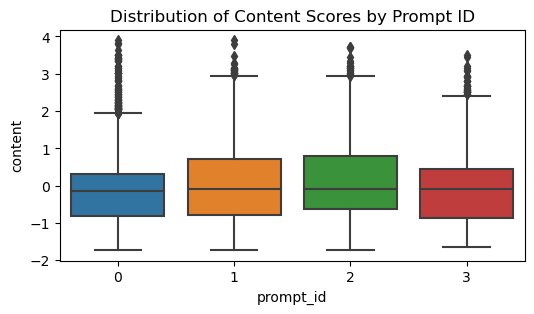

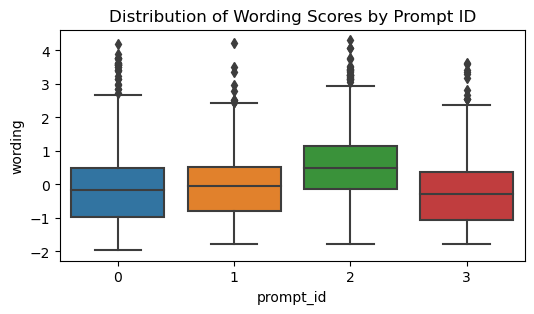

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for content scores across different prompt_ids
plt.figure(figsize=(6, 3))
sns.boxplot(x='prompt_id', y='content', data=summaries_train)
plt.title('Distribution of Content Scores by Prompt ID')
plt.show()

# Boxplot for wording scores across different prompt_ids
plt.figure(figsize=(6, 3))
sns.boxplot(x='prompt_id', y='wording', data=summaries_train)
plt.title('Distribution of Wording Scores by Prompt ID')
plt.show()


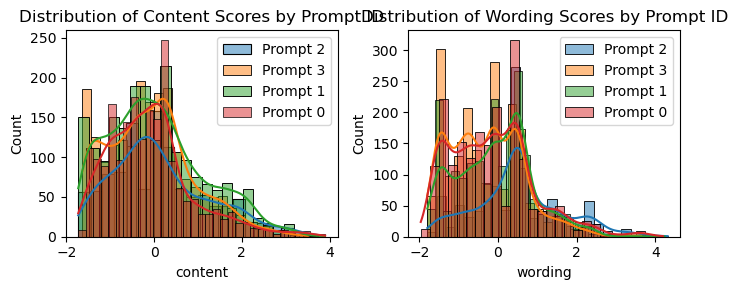

In [14]:
plt.figure(figsize=(7, 3))

# Histogram for content scores
plt.subplot(1, 2, 1)
for prompt in summaries_train['prompt_id'].unique():
    subset = summaries_train[summaries_train['prompt_id'] == prompt]
    sns.histplot(subset['content'], kde=True, label=f'Prompt {prompt}')
plt.legend()
plt.title('Distribution of Content Scores by Prompt ID')

# Histogram for wording scores
plt.subplot(1, 2, 2)
for prompt in summaries_train['prompt_id'].unique():
    subset = summaries_train[summaries_train['prompt_id'] == prompt]
    sns.histplot(subset['wording'], kde=True, label=f'Prompt {prompt}')
plt.legend()
plt.title('Distribution of Wording Scores by Prompt ID')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Sample Data Loading (You've already done this)
# ... your data loading code ...

correlations = {}

# Correlation for each prompt ID
for prompt in summaries_train['prompt_id'].unique():
    subset = summaries_train[summaries_train['prompt_id'] == prompt]
    correlation = subset['content'].corr(subset['wording'])
    correlations[f'Prompt {prompt}'] = correlation

# Correlation for the whole dataset
correlations['Overall'] = summaries_train['content'].corr(summaries_train['wording'])

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Prompt ID', 'Correlation'])
print(correlations_df)


  Prompt ID  Correlation
0  Prompt 2     0.813791
1  Prompt 3     0.753413
2  Prompt 1     0.687494
3  Prompt 0     0.812911
4   Overall     0.751380
